In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Directory containing CSV files
csv_files = [
    "round-2-island-data-bottle/prices_round_2_day_-1.csv",
    "round-2-island-data-bottle/prices_round_2_day_0.csv",
    "round-2-island-data-bottle/prices_round_2_day_1.csv"
]

csv_dir = "round-2-island-data-bottle"
df_list = [pd.read_csv(f, sep=";") for f in csv_files]
df = pd.concat(df_list, ignore_index=True)
df["time"] = df["day"] * 1000000 + df["timestamp"]

# Define product list
products = [
    # "RAINFOREST_RESIN", "SQUID_INK", "KELP",
    "PICNIC_BASKET1", "PICNIC_BASKET2",
    "DJEMBES", "CROISSANTS", "JAMS"
]

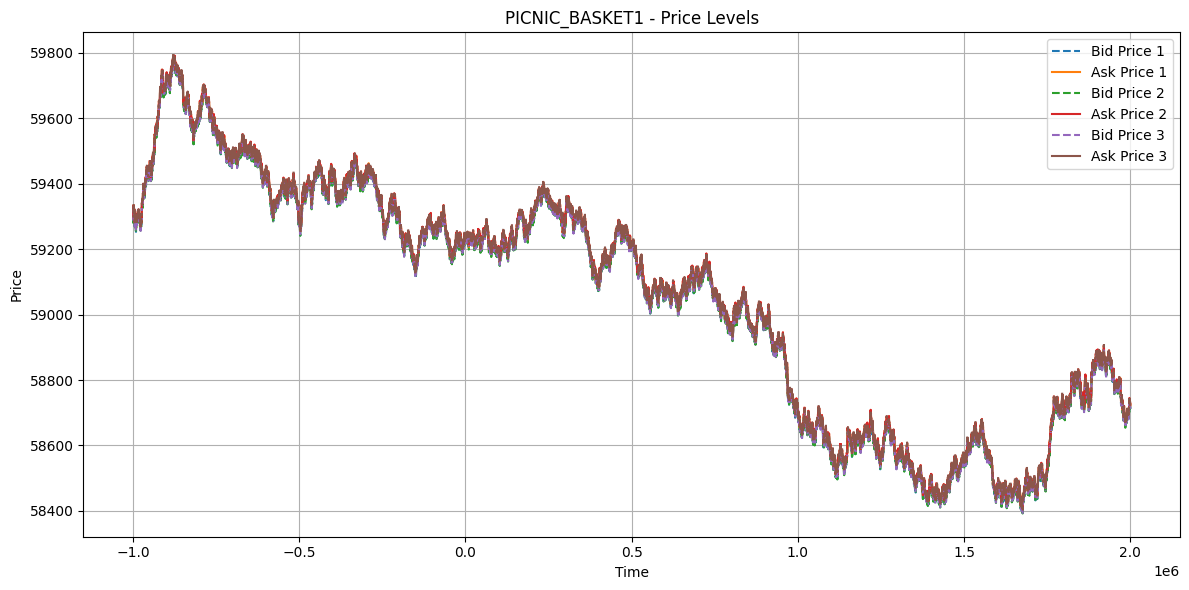

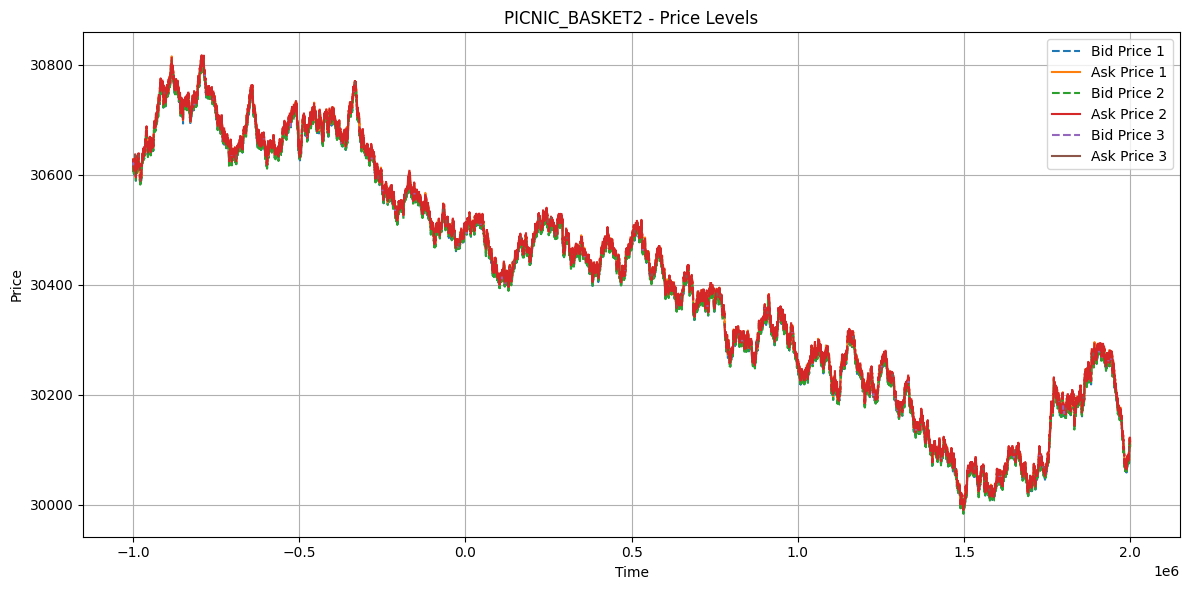

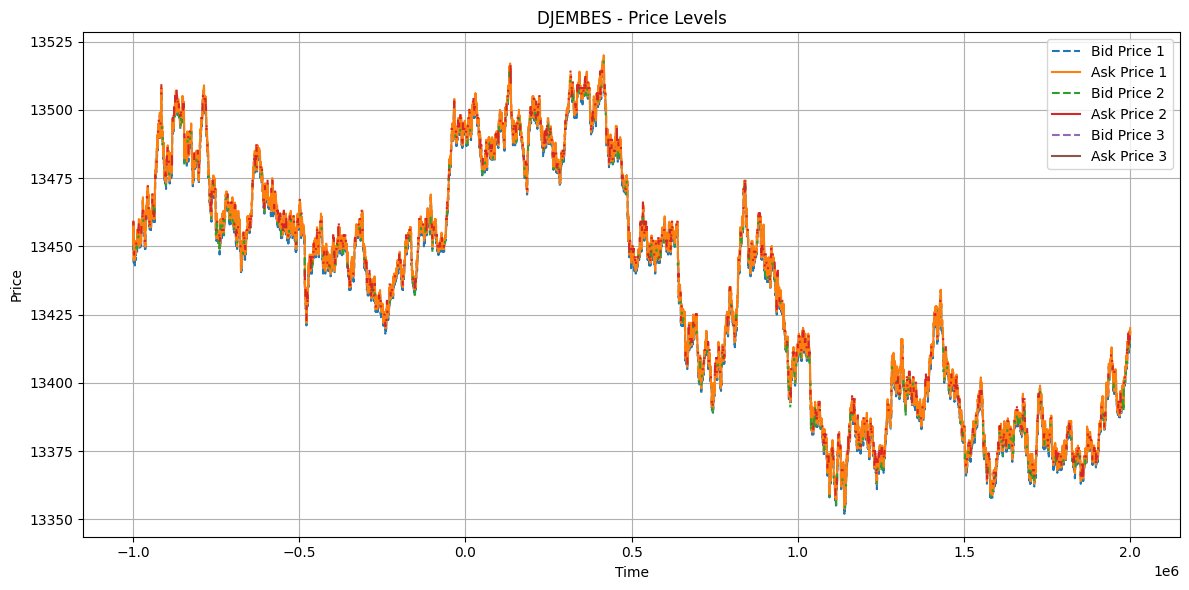

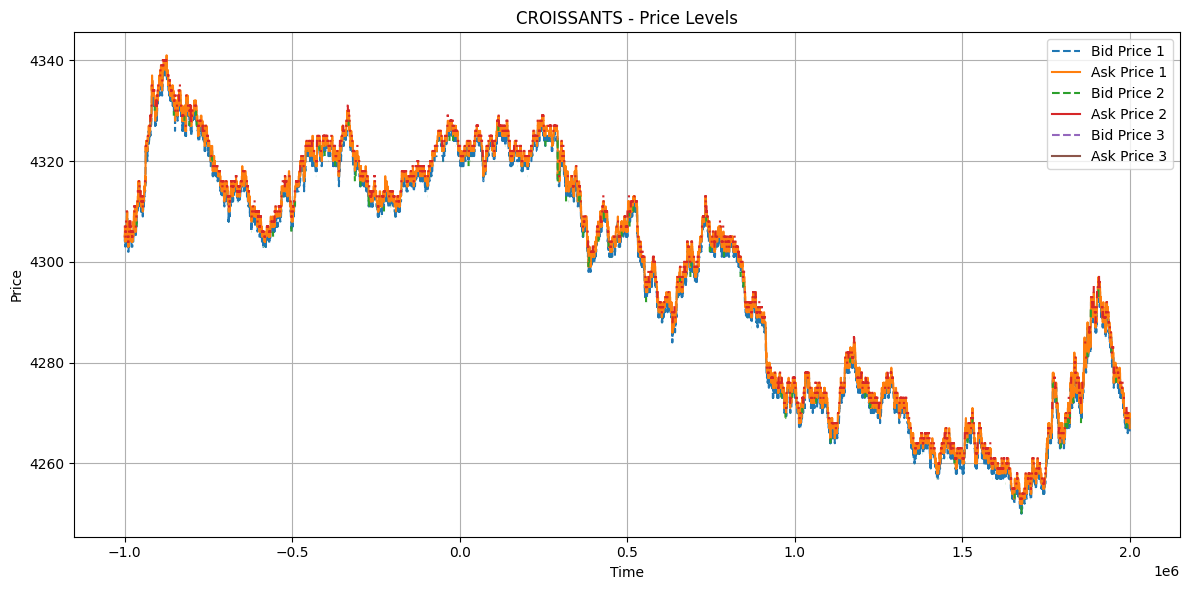

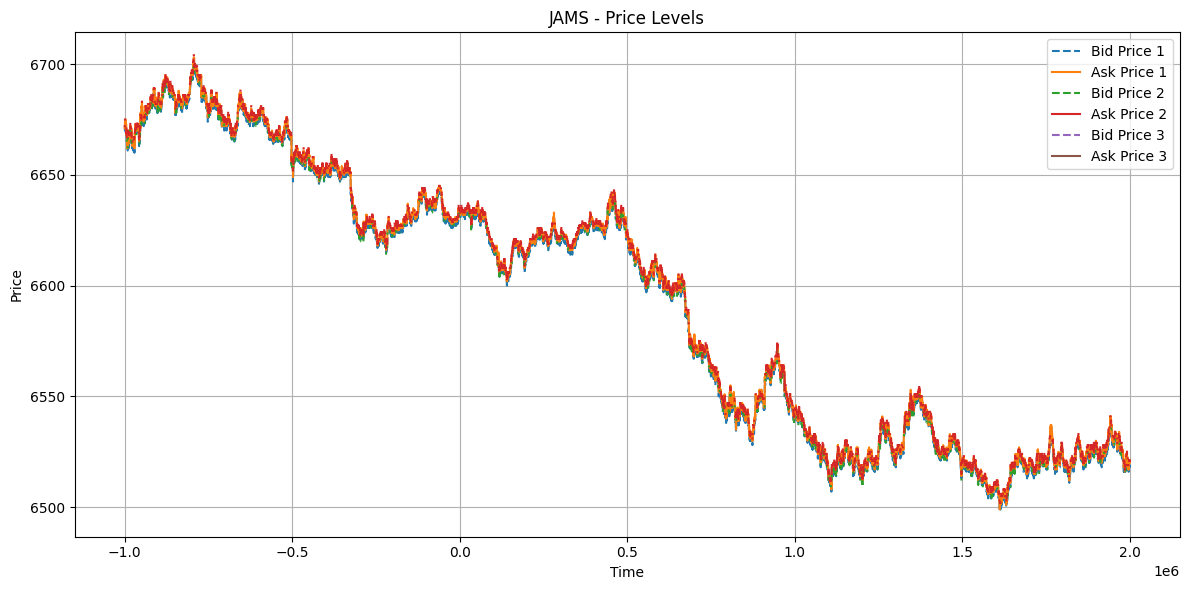

In [4]:
# Loop through each product and generate two plots
for product in products:
    product_df = df[df["product"] == product].copy()

    # Price chart
    plt.figure(figsize=(12, 6))
    for level in range(1, 4):
        if f"bid_price_{level}" in product_df:
            plt.plot(product_df["time"], product_df[f"bid_price_{level}"], label=f"Bid Price {level}", linestyle='--')
        if f"ask_price_{level}" in product_df:
            plt.plot(product_df["time"], product_df[f"ask_price_{level}"], label=f"Ask Price {level}", linestyle='-')
    plt.title(f"{product} - Price Levels")
    plt.xlabel("Time")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # # Volume chart
    # plt.figure(figsize=(12, 6))
    # for level in range(1, 4):
    #     if f"bid_volume_{level}" in product_df:
    #         plt.plot(product_df["time"], product_df[f"bid_volume_{level}"], label=f"Bid Volume {level}", linestyle='--')
    #     if f"ask_volume_{level}" in product_df:
    #         plt.plot(product_df["time"], product_df[f"ask_volume_{level}"], label=f"Ask Volume {level}", linestyle='-')
    # plt.title(f"{product} - Volume Levels")
    # plt.xlabel("Time")
    # plt.ylabel("Volume")
    # plt.legend()
    # plt.grid(True)
    # plt.tight_layout()
    # plt.show()


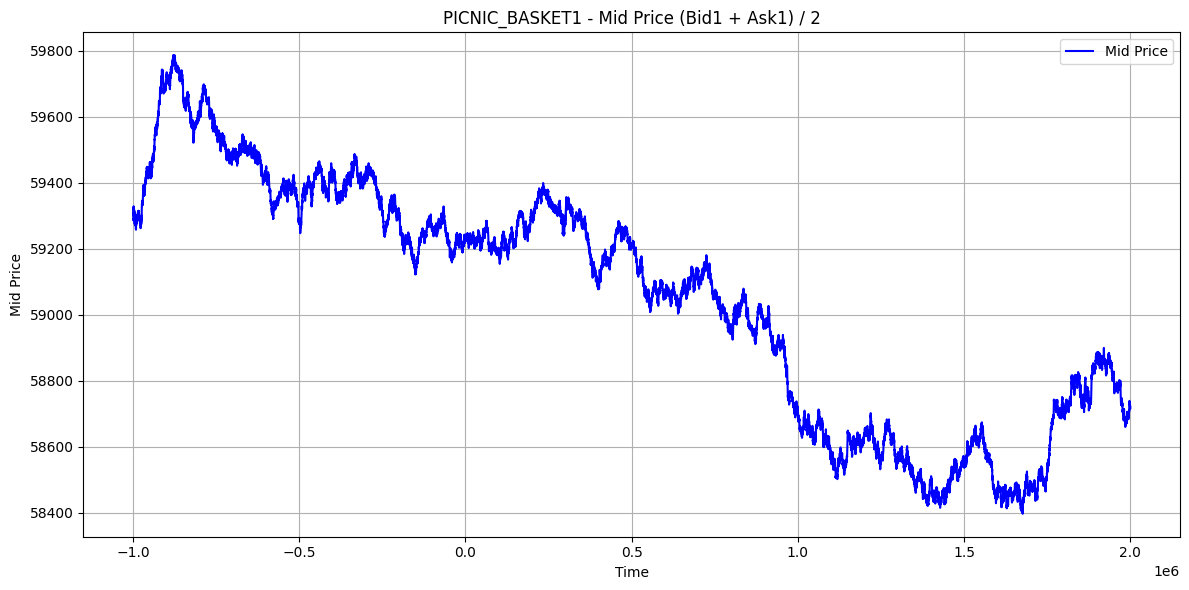

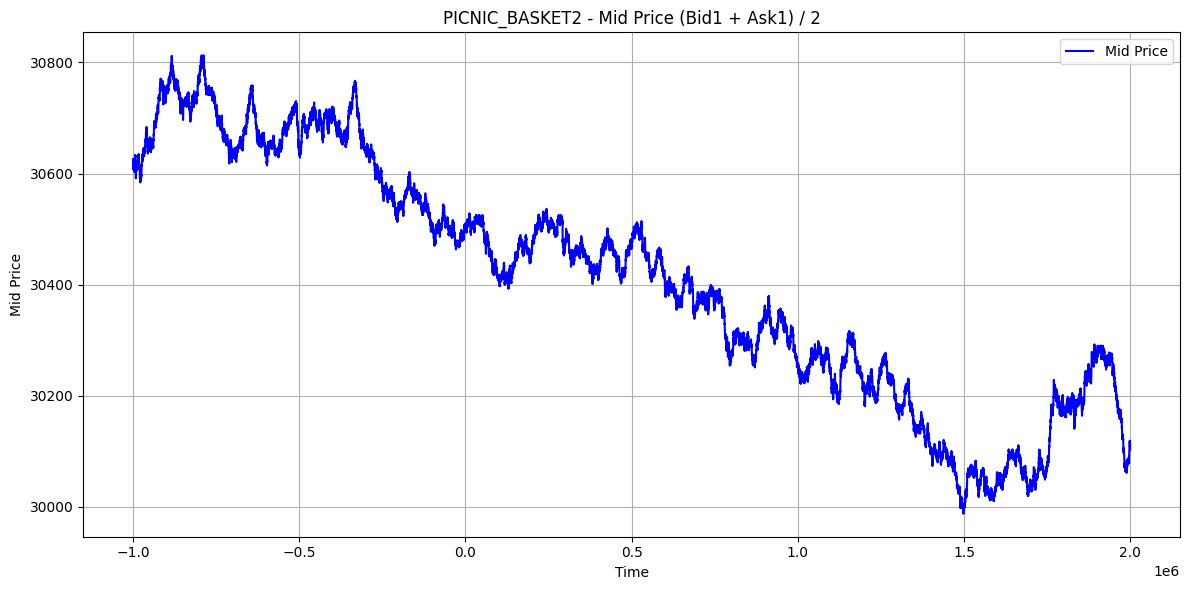

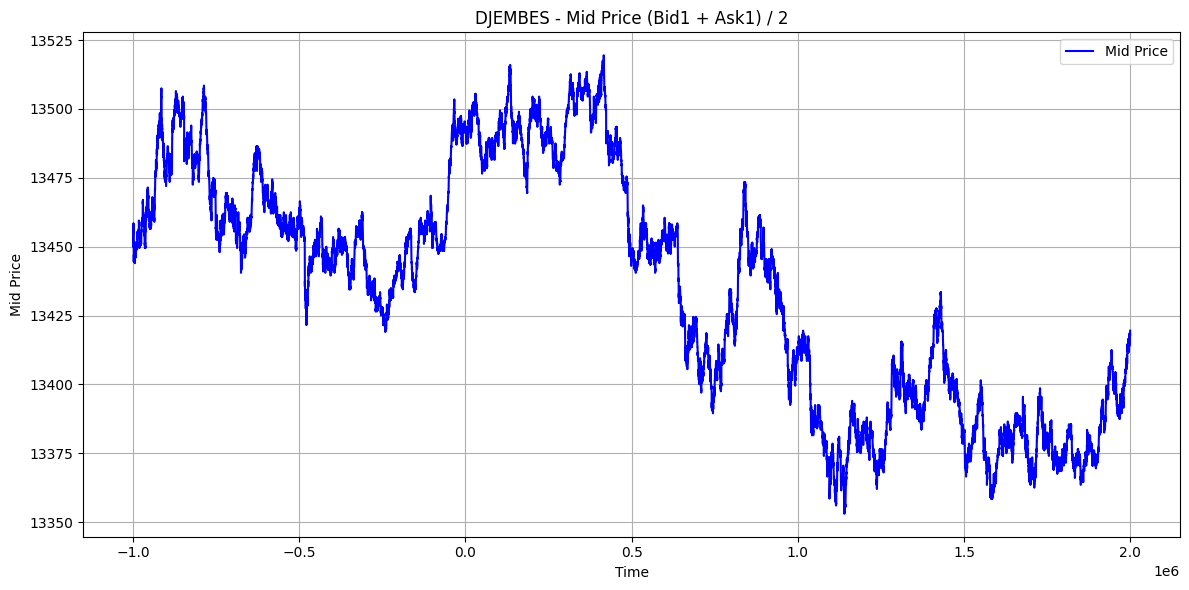

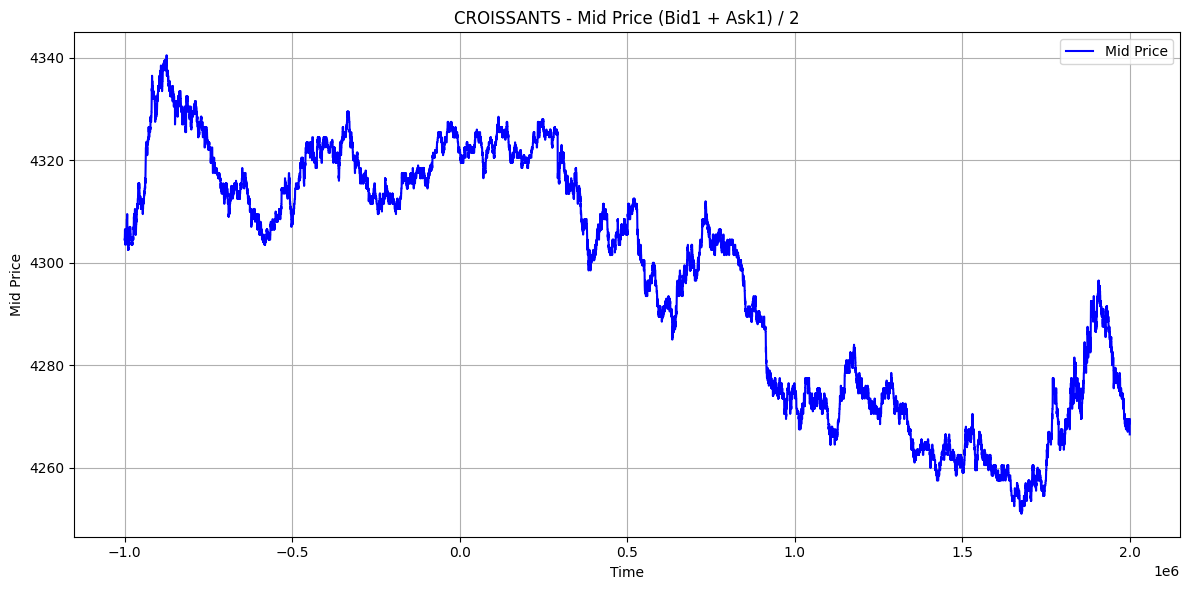

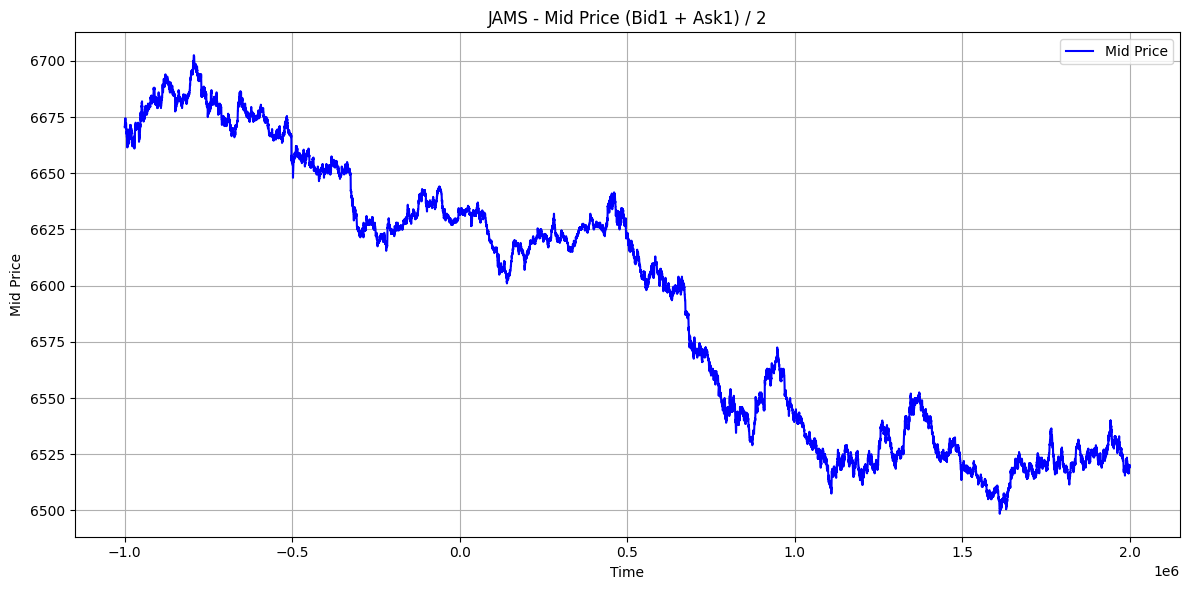

In [5]:
mid_prices = {}

for product in products:
    product_df = df[df["product"] == product].copy()

    # Calculate mid only where both prices exist
    valid = product_df["bid_price_1"].notna() & product_df["ask_price_1"].notna()
    mids = (product_df.loc[valid, "bid_price_1"] + product_df.loc[valid, "ask_price_1"]) / 2
    mid_prices[product] = (product_df.loc[valid, "time"], mids)

    plt.figure(figsize=(12, 6))
    plt.plot(product_df.loc[valid, "time"], mids, label="Mid Price", color="blue")
    plt.title(f"{product} - Mid Price (Bid1 + Ask1) / 2")
    plt.xlabel("Time")
    plt.ylabel("Mid Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

/Users/jennifer/github/ImPro26/labs/myenv/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/jennifer/github/ImPro26/labs/myenv/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


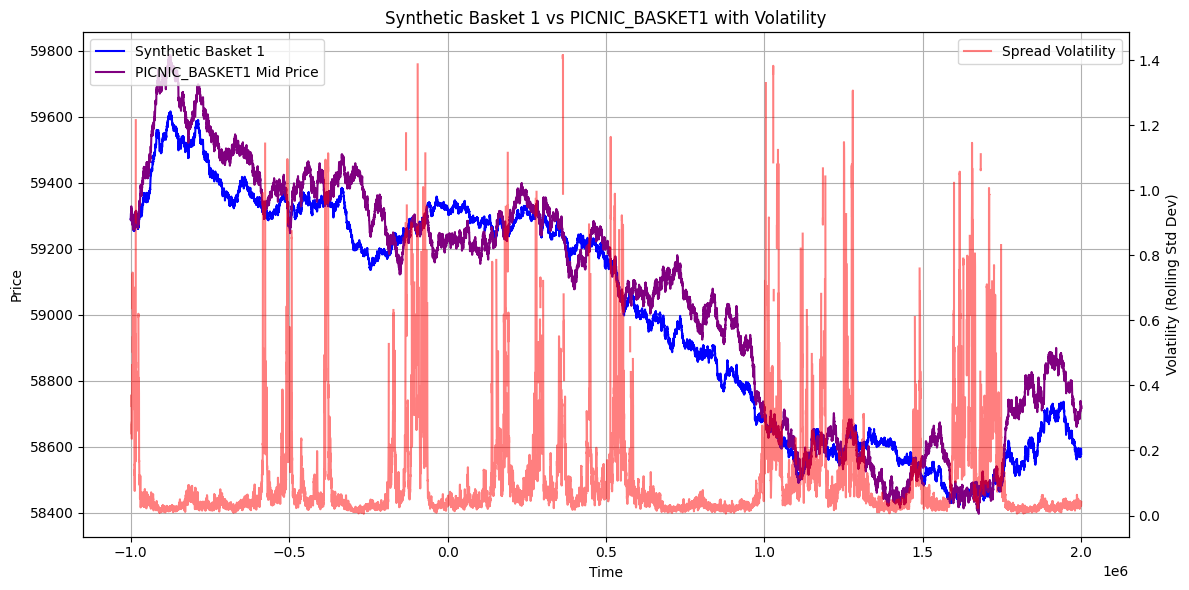

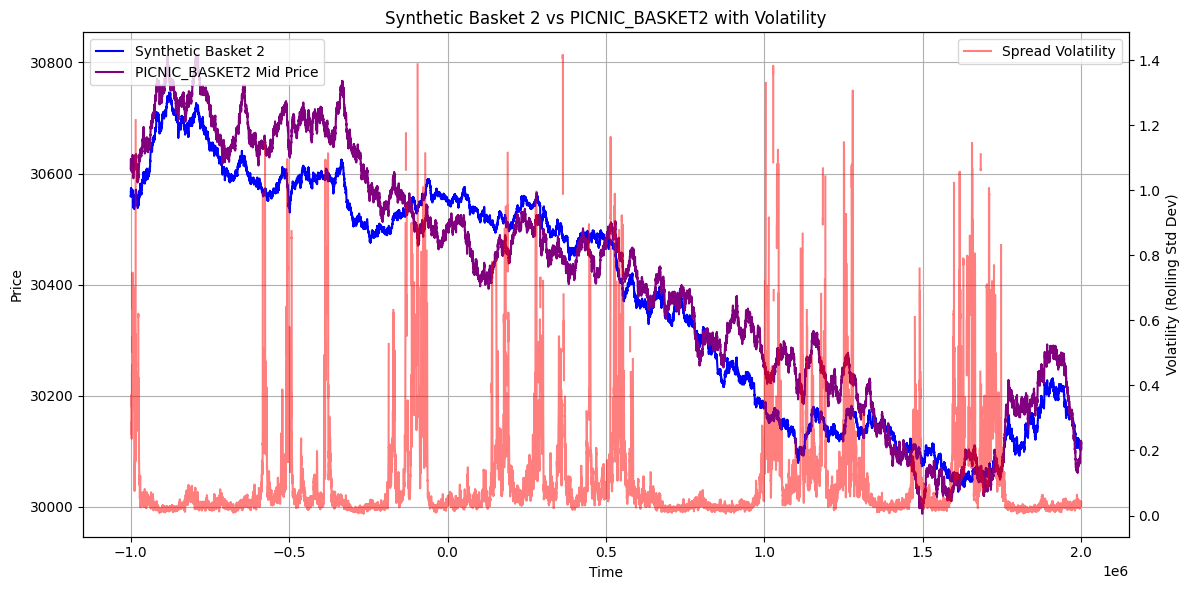

In [18]:
merged_df = pd.DataFrame({'time': mid_prices["CROISSANTS"][0]})
for product in products:
    merged_df[product] = pd.Series(mid_prices[product][1]).values

synthetic_basket1_mids = (6 * merged_df["CROISSANTS"] +
                          3 * merged_df["JAMS"] +
                          1 * merged_df["DJEMBES"])

synthetic_basket2_mids = (4 * merged_df["CROISSANTS"] +
                          2 * merged_df["JAMS"])

# spread rolling volatility
pb1_spread = merged_df["PICNIC_BASKET1"] - synthetic_basket1_mids
pb1_spread_log_returns = np.log(pb1_spread / pb1_spread.shift(1))
pb1_spread_volatility = pb1_spread_log_returns.rolling(window=10).std()
pb2_spread = merged_df["PICNIC_BASKET2"] - synthetic_basket2_mids
pb2_spread_log_returns = np.log(pb2_spread / pb2_spread.shift(1))
pb2_spread_volatility = pb2_spread_log_returns.rolling(window=10).std()

fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(merged_df["time"], synthetic_basket1_mids, label="Synthetic Basket 1", color="blue")
ax1.plot(merged_df["time"], merged_df["PICNIC_BASKET1"], label="PICNIC_BASKET1 Mid Price", color="purple")
ax1.set_xlabel("Time")
ax1.set_ylabel("Price")
ax1.legend(loc="upper left")
ax1.grid(True)
ax2 = ax1.twinx()
ax2.plot(merged_df["time"], pb1_spread_volatility, label="Spread Volatility", color="red", alpha=0.5)
ax2.set_ylabel("Volatility (Rolling Std Dev)")
ax2.legend(loc="upper right")
plt.title("Synthetic Basket 1 vs PICNIC_BASKET1 with Volatility")
plt.tight_layout()
plt.show()

fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(merged_df["time"], synthetic_basket2_mids, label="Synthetic Basket 2", color="blue")
ax1.plot(merged_df["time"], merged_df["PICNIC_BASKET2"], label="PICNIC_BASKET2 Mid Price", color="purple")
ax1.set_xlabel("Time")
ax1.set_ylabel("Price")
ax1.legend(loc="upper left")
ax1.grid(True)
ax2 = ax1.twinx()
ax2.plot(merged_df["time"], pb1_spread_volatility, label="Spread Volatility", color="red", alpha=0.5)
ax2.set_ylabel("Volatility (Rolling Std Dev)")
ax2.legend(loc="upper right")
plt.title("Synthetic Basket 2 vs PICNIC_BASKET2 with Volatility")
plt.tight_layout()
plt.show()